<a href="https://colab.research.google.com/github/kmk028/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# y = Sin(x) Passes vertical line test
# y = pi(r)**2 Fails vertical line test 

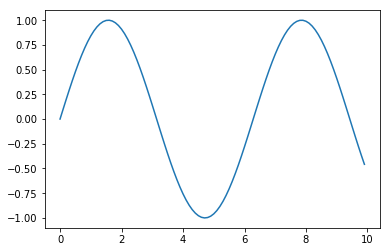

In [6]:
x = np.arange(0,10,0.1)
y = np.sin(x)
plt.plot(x,y)
plt.show();

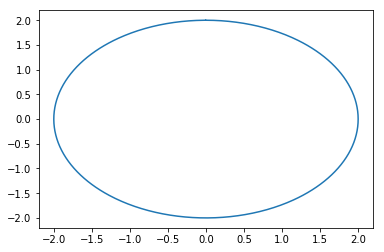

In [19]:
r = 2
t = np.arange(0,2*np.pi,0.01)
x = r*np.sin(t)
y = r*np.cos(t)
plt.plot(x,y)
plt.show();

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

A Function by definition has a property that each input is mapped to exactly 1 output. if a vertical line passes over a function and touches more than 1 point its not a function. 

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Only Relation 2 is function.
rest of them have repeated x co-ordinate, which means rest of them have 2 outputs for 1 input which is by definition NOT. a function.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

1. Input Dimensionality: 3, Output Dimensionality: 3

2. Input Dimensionality: 4, Output Dimensionality: 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
Transfor_mat_p = np.matrix('1 3; -1 2')
in_mat = np.array([2,3])

print (1*2+)

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [56]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
# Spcies has 3 unique values. 
df['species'].unique()

# decompose df into 3 dataframes for each value

# setosa = df[df['species']=='setosa']
# versicolor = df[df['species']=='versicolor']
# virginica = df[df['species']=='virginica']

In [0]:
from numpy.linalg import eig

#Function that returns dataframe of data points mapped to eigen subspace. 
def pca (df):
  # Split data into Target and features. I am taking species column as target. 
  target = df['species']
  features = df.drop('species',axis =1)
  # Standardize the features. Calculating mean and subtracting it from features. 
  #Skipping Standard deviation division since feature values do not vary very much
  standard_matrix = features - np.mean(features.T,axis=1)
  # calculate variance-covariance matrix of standardized matrix
  var_covar_matrix = np.cov(standard_matrix.T)
  # eigendecomposition of covariance matrix
  values, vectors = eig(var_covar_matrix)
  # project data points on eigen subspace.
  P = vectors.T.dot(standard_matrix.T)
  P = pd.DataFrame(P).T
  #plt.scatter(P[0],P[1])
  #plt.show()
  return (P)

# def plot_pca(df,color):
#   plt.scatter(df[0],df[1],c = color)
#   plt.show()

In [102]:
df['species'].shape

(150,)

In [107]:
# join target column 

transform_df = pd.concat([df['species'],pca(df)],axis=1)
transform_df.sample(5)

,species,0,1,2,3
139,virginica,2.107654,-0.371482,0.027438,0.209955
98,versicolor,-0.908463,0.751569,-0.007737,0.233559
34,setosa,-2.673845,0.106692,-0.191533,-0.055891
59,versicolor,-0.010190,0.720575,0.283437,-0.005946
19,setosa,-2.587346,-0.520474,0.219572,-0.069082


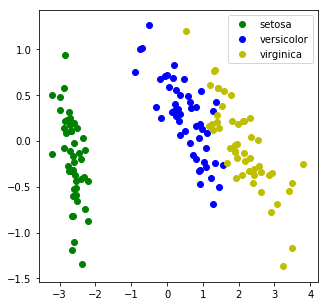

In [115]:
# PC1 and PC2 for setosa,versicolor and virginica

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.scatter(transform_df[transform_df['species']=='setosa'][0],transform_df[transform_df['species']=='setosa'][1],c='g');
ax.scatter(transform_df[transform_df['species']=='versicolor'][0],transform_df[transform_df['species']=='versicolor'][1],c='b');
ax.scatter(transform_df[transform_df['species']=='virginica'][0],transform_df[transform_df['species']=='virginica'][1],c='y');
ax.legend(['setosa','versicolor','virginica']);


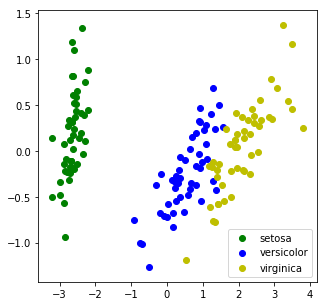

In [119]:
# Using PCA library 
from sklearn.decomposition import PCA
features = df.drop('species',axis =1)
pca = PCA(2)
pca.fit(features)
B = pd.DataFrame(pca.transform(features))


transform_df = pd.concat([df['species'],B],axis=1)

# PC1 and PC2 for setosa,versicolor and virginica

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.scatter(transform_df[transform_df['species']=='setosa'][0],transform_df[transform_df['species']=='setosa'][1],c='g');
ax.scatter(transform_df[transform_df['species']=='versicolor'][0],transform_df[transform_df['species']=='versicolor'][1],c='b');
ax.scatter(transform_df[transform_df['species']=='virginica'][0],transform_df[transform_df['species']=='virginica'][1],c='y');
ax.legend(['setosa','versicolor','virginica']);

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)